# Base Exploratory Data Analysis of the dataset

## Import Packages and data

In [1]:
# import packages
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import all of them 
sales_original = pd.read_csv("data/sales_train.csv.gz", compression='gzip')
item_cat = pd.read_csv("data/item_categories.csv")
item = pd.read_csv("data/items.csv")
shops=pd.read_csv("data/shops.csv")
test=pd.read_csv("data/test.csv.gz", compression='gzip')

In [3]:
sales_original.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## Data Processing

In [28]:
# Copy and clean sales dataset
sales = sales_original

# set shop_id, item_id to categorical variables
sales['shop_id'] = sales['shop_id'].astype('category')
sales['item_id'] = sales['item_id'].astype('category')

# Merge with item_cat
item['item_id'] = item['item_id'].astype('category')
item['item_category_id'] = item['item_category_id'].astype('category')

sales = pd.merge(sales, item, on='item_id', how='left')
sales = sales.drop(['item_name'], axis=1)
# convert to datetime
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')

# set index
sales = sales.set_index('date')

# Grouping and Resampling per month for prediction
sales = sales.groupby(['shop_id', 'item_category_id', 'item_id']).resample('M').sum()

# see dataset info


In [27]:
sales

AttributeError: 'DatetimeIndexResamplerGroupby' object has no attribute 'ngroup'

## Exploratory Data Analysis

### Dataset outlook

In [5]:
print(sales.describe())
sales.head()

       date_block_num       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  2.216900e+04  3.079800e+05  2.169000e+03


,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
date,,,,,,,
2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [6]:
print(item_cat.describe())
item_cat.head()

       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
print(item.describe())
item.head()

                                                item_name  item_id  \
count                                               22170    22170   
unique                                              22170    22170   
top     Giana sisters. Twisted Dreams [PС, Jewel, русс...    22169   
freq                                                    1        1   

        item_category_id  
count              22170  
unique                84  
top                   40  
freq                5035  


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
print(shops.describe())
shops.head()

         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


**Conclusion:**

60 different shops
21807 single items
84 item categories

### Rapid visualization

In [10]:
plt.style.use('ggplot')

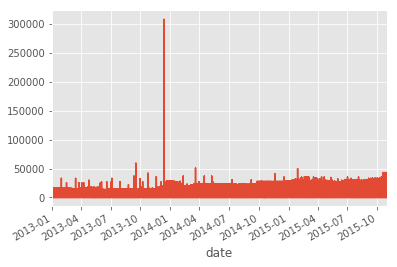

In [11]:
sales['item_price'].plot()
plt.show()

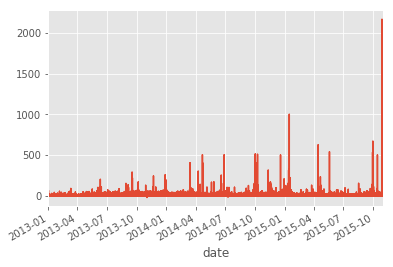

In [12]:
sales['item_cnt_day'].plot()
plt.show()

In [13]:
sales.resample("Y").sum()

,date_block_num,item_id,item_price,item_cnt_day
date,,,,
2013-12-31,6999357,12906195991,9.212613e+08,1562733.0
2014-12-31,18586791,10658165504,1.043554e+09,1320889.0
2015-12-31,17188912,6373157363,6.505952e+08,764584.0


In [14]:
sales.groupby('shop_id').resample("Y").sum()

date_block_num    item_id    item_price  item_cnt_day
shop_id date                                                             
0       2013-12-31            5064  104811661  5.553869e+06       11705.0
1       2013-12-31            2984   60950373  2.926161e+06        6311.0
2       2013-12-31           50429   72909171  1.035830e+07        9961.0
        2014-12-31          179452   83463184  1.498966e+07       12221.0
        2015-12-31          203957   65804688  9.756486e+06        8438.0
3       2013-12-31           53597   84494489  7.388395e+06       10199.0
        2014-12-31          171655   86632402  1.085791e+07       10998.0
        2015-12-31          181407   58548070  8.226313e+06        7158.0
4       2013-12-31           90330  149316140  1.335832e+07       19002.0
        2014-12-31          239636  123516980  1.408118e+07       15857.0
        2015-12-31          224839   78951986  7.895895e+06        9083.0
5       2013-12-31           85751  133346456  9.195336e+06       14696.0
        2014-12-31          263514  148920874  1.456492e+07       17003.0
        2015-12-31          281474  104014615  9.500620e+06       11063.0
6       2013-12-31          212343  371711346  2.795607e+07       46599.0
        2014-12-31          507353  288743683  2.916807e+07       35381.0
        2015-12-31          442816  161036762  1.743418e+07       18509.0
7       2013-12-31          138371  236781276  1.924978e+07       28186.0
        2014-12-31          368341  200142774  2.239249e+07       24484.0
        2015-12-31          355912  126554628  1.443484e+07       14388.0
8       2013-12-31            2955   34251633  2.226273e+06        3595.0
9       2013-12-31           13392   17668038  1.617737e+06        6526.0
        2014-12-31           29757   18231529  1.839812e+06        6155.0
        2015-12-31           27912   13392429  1.256754e+06        3185.0
10      2013-12-31           54792   88776405  6.145594e+06       11132.0
        2014-12-31          135064   70504092  6.879313e+06        8859.0
        2015-12-31          113599   39127973  3.417937e+06        4532.0
11      2015-12-31           12475    4839666  4.798425e+05         572.0
12      2013-12-31           68214  100064718  1.507226e+07       19201.0
        2014-12-31          224204  126834880  1.941470e+07       26261.0
...                            ...        ...           ...           ...
50      2013-12-31          197274  343305702  3.002622e+07       41859.0
        2014-12-31          351709  211080811  2.208730e+07       23979.0
        2015-12-31          263049   95609795  1.124344e+07       10400.0
51      2013-12-31          121231  266207689  9.422258e+06       26177.0
        2014-12-31          262175  168078360  8.860214e+06       16210.0
        2015-12-31          170281   67548189  3.573118e+06        6380.0
52      2013-12-31          106498  182267072  1.325148e+07       22085.0
        2014-12-31          270817  149590576  1.547096e+07       17554.0
        2015-12-31          259636   96068166  8.926678e+06       10105.0
53      2013-12-31          126127  199699383  1.713053e+07       25980.0
        2014-12-31          340136  177479502  1.969907e+07       22739.0
        2015-12-31          321556  113676553  1.109926e+07       12938.0
54      2013-12-31          395935  813804829  4.860793e+07       96335.0
        2014-12-31          971515  611946748  4.815340e+07       73834.0
        2015-12-31          333147  149816818  1.290810e+07       15621.0
55      2013-12-31           45290   33730035  2.271826e+06        7433.0
        2014-12-31          275350   99059118  8.710458e+06       24285.0
        2015-12-31          397914  105491153  1.015358e+07       31670.0
56      2013-12-31          169465  338056536  1.914805e+07       34583.0
        2014-12-31          440264  275503875  1.990648e+07       28298.0
        2015-12-31          385270  153644121  1.264185e+07       15198.0
57      2013-12-31      

In [15]:
sales.groupby('shop_id').count()

,date_block_num,item_id,item_price,item_cnt_day,item_name,item_category_id
shop_id,,,,,,
0,9857,9857,9857,9857,9857,9857
1,5678,5678,5678,5678,5678,5678
2,25991,25991,25991,25991,25991,25991
3,25532,25532,25532,25532,25532,25532
4,38242,38242,38242,38242,38242,38242
5,38179,38179,38179,38179,38179,38179
6,82663,82663,82663,82663,82663,82663
7,58076,58076,58076,58076,58076,58076
8,3412,3412,3412,3412,3412,3412


In [16]:
sales.groupby('item_id').count()

,date_block_num,shop_id,item_price,item_cnt_day,item_name,item_category_id
item_id,,,,,,
0,1,1,1,1,1,1
1,6,6,6,6,6,6
2,2,2,2,2,2,2
3,2,2,2,2,2,2
4,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,2,2,2,2,2,2
